<a href="https://colab.research.google.com/github/cihan38/ML-Sklearn-json-parse-with-Colab/blob/master/ML_sci_kit_learn_amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hello everybody! 

#Mount drive and TPU runtime

We now continue onto analyzing the Amazon reviews data using machine learning via scikit-learn.  We will predict customer numerical ratings (ranging from 1 to 5) using their written reviews. This is an example of supervised learning since we will provide labels for our predictions. 
  
Please visit my previous post (json_prsing_colab.ipynb) in this repository where you will find instructions on how to mount your Google Drive to Colab.

Before the analyses, go to Colab, select “Runtime” and select “Change runtime type.” Change your “Hardware accelerator” to “TPU” and save it. Now you can get help from Google’s Compute Engine (i.e., cloud computing). This will prevent potential crashes while running the codes in Colab (i.e., for loop). Some computers/laptops may not have enough ram/memory which may increase the likelihood of a crash during the runtime. This is why I love Colab as it allows us to access Google’s cloud computing while providing an extra boost to our computers at no cost.



In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



#Glob Module to merge 

Glob module is very useful at reading multiple files located in a single folder. With Glob module, four json files were merged into a single file in my Google Drive (for more information, see: https://docs.python.org/3/library/glob.html)
We can use “*” as a special character (see the folder path below for an example: “*.json” ) to select all of the files containing the “.json” extension.  
Set “output” as an empty list. Now we can transfer this into a Python list. We can read the first five lines and identify the dictionary values and keys. As we can see, it is a dictionary within a list. 
 


In [0]:
import json
import glob

read_files = glob.glob('/content/drive/My Drive/amazon large data/*.json')

output = []
for f in read_files:
  with open(f) as infile:
    for line in infile:
      output.append(json.loads(line))

print(output[0:5])

[{'reviewerID': 'A1E0B5OTKOZ0S7', 'asin': 'B0033H7VI6', 'reviewerName': 'Sexybutt', 'helpful': [0, 0], 'reviewText': "The hell? I don't remember buying it, but it's in my orders? Well, Like the knife, just don't like the sheath, the sheath sucks! Too bulky.", 'overall': 5.0, 'summary': 'When the hell did I buy this?', 'unixReviewTime': 1391385600, 'reviewTime': '02 3, 2014'}, {'reviewerID': 'AOUCACT2WQPM0', 'asin': 'B000BFXQHS', 'reviewerName': 'Patrick Shaffer', 'helpful': [0, 0], 'reviewText': "I don't consider my forearms to be particularly large and maybe I just need to find a better fit but I've used this for a while now and don't really love it. I am constantly readjusting it after a few pulls.", 'overall': 3.0, 'summary': 'Good for average to smaller forearms', 'unixReviewTime': 1398988800, 'reviewTime': '05 2, 2014'}, {'reviewerID': 'A51U442TJ00T0', 'asin': 'B0000C52LF', 'reviewerName': 'Perry J Smith', 'helpful': [0, 0], 'reviewText': 'Looks like a great holster, but did not w


#Writing/saving 

The merged file (“data.json”) was saved into my Google Drive (this is optional).


In [0]:
with open('/content/drive/My Drive/amazon large data/data.json', 'w') as f:
	for line in output:
		f.write(json.dumps(line)+'\n')


#Checking the data

We successfully merged and saved the data. Using "for loop" we can store the json file into a list prior to the analyses. The merged data includes 40000 reviews (each json file has 10000 reviews).



In [0]:
import json

data = "/content/drive/My Drive/amazon large data/data.json"

data_list= []
with open(data) as f:
  for line in f:
    data_list.append(json.loads(line))

print(len(data_list))
print(type(data_list))

40000
<class 'list'>



#Pandas module

Many data scientists use the Pandas module in Python because it is both versatile and very easy to use. We can easily obtain summary statistics for our data using Pandas.  While Pandas is capable of running various analyses, we will only be using it to obtain summary statistics of “overall” numerical ratings (ranging from 1 to 5 with 1 indicating low and 5 indicating high product ratings). Keep in mind that we are trying to predict the overall numerical rating using machine learning.

The frequency distribution reveals that the vast majority of Amazon reviews had overall numerical ratings as 5 stars (i.e., 24767 reviews).  This indicates an uneven distribution of Amazon numerical reviews across the different ratings.


In [0]:
import pandas as pd

df = pd.DataFrame(data_list)

freq_overall = df['overall'].value_counts()

print(freq_overall) 


5.0    24765
4.0     8177
3.0     3684
2.0     1740
1.0     1634
Name: overall, dtype: int64



#Visualization
 
I also recommend that you visualize the frequency distribution to see if the reviews are evenly distributed (in the above cell, we discovered that the data is not evenly distributed but we will visualize that here). The graph indicates that the majority of the reviews are 5 star reviews. 
For fun, I used the code “plt.xkcd()” to change the style of the graph.  This code coverts the appearance of my graph to a comic book style.  Be aware that matplotlib includes different graph/chart styles for visualization of the data. 


findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


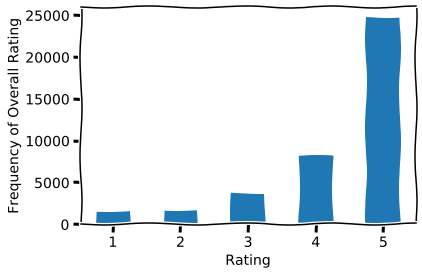

In [0]:
from matplotlib import pyplot as plt
overall_values = set(df['overall'].values)
overall_values = list(overall_values)[::-1]

plt.xkcd()

width = 0.5

plt.bar(overall_values, freq_overall,  width = width)

plt.ylabel("Frequency of Overall Rating")
plt.xticks(overall_values, ('5', '4', '3', '2', '1'))
plt.xlabel("Rating")
plt.show()



#Grouping/screening/cleaning data

Class method is a very useful way of grouping and cleaning the data. We can embed various functions into a class. I used two classes for grouping the data. 

The class labeled as “Content" has additional functions for grouping and cleaning (tokenization) the words in the data.

Recall in the previous two cells, we explored the distribution of reviews across the 5 star rating system.  Since we discovered that the reviews are unevenly distributed across the 5 review categories, we will need to group these categories to make the distribution more even.  To do this, we will use the “get_rate” function to group reviews with 4 and 5 star ratings as “HIGH" and 1 and 2 star ratings as “LOW.”  Reviews with 3 stars will be labeled as “MIXED” and will be excluded from our analyses. However, you can practice the analyses by including the mixed reviews (i.e., reviews rated as 3 stars) if you wish. 

In order to call the “clean_str” function, we have to import a “re” module (i.e., regular expression). This is commonly used for altering the text, in this case, the text of the reviews. For example, all of the words were altered by changing all capital letters to lower case letters.

For more info, see the following: Tokenization/string cleaning for all datasets except for SST.
Original taken from https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py



In [0]:
import re

class Rate:
  HIGH = "HIGH"
  MIXED = "MIXED"
  LOW = "LOW"
  
class Content:
  def __init__(self, content, rating, sumcontent):
    self.content = content
    self.rating = rating
    self.sumcontent = sumcontent
    self.rate= self.get_rate()
    self.content = self.clean_str(content)
      
  def get_rate(self):
    if self.rating >= 4:             
      return Rate.HIGH    
    elif self.rating == 3:
      return Rate.MIXED
    else:
      return Rate.LOW 
        
  def clean_str(self, content):
    
    content = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", content)
    content = re.sub(r"\'s", " \'s", content)
    content = re.sub(r"\'ve", " \'ve", content)
    content = re.sub(r"n\'t", " n\'t", content)
    content = re.sub(r"\'re", " \'re", content)
    content = re.sub(r"\'d", " \'d", content)
    content = re.sub(r"\'ll", " \'ll", content)
    content = re.sub(r",", " , ", content)
    content = re.sub(r"!", " ! ", content)
    content = re.sub(r"\(", " \( ", content)
    content = re.sub(r"\)", " \) ", content)
    content = re.sub(r"\?", " \? ", content)
    content = re.sub(r"\s{2,}", " ", content)
    return content.strip().lower()
    
# class ReviewSample:

#   def __init__(self, texts):
#     self.texts = texts

#   def get_text(self):
#     return [x.content for x in self.texts]
   
#   def get_rating(self):
#     return [x.rating for x in self.texts]
  
  # def evenly_distribute(self): 
  #   low = list(filter(lambda x: x.rate == Rate.LOW, self.texts)) 
  #   high = list(filter(lambda x: x.rate == Rate.HIGH, self.texts))
       
  #   high_sample = high[:len(low)]
  #   self.texts = low + high_sample 
  #   random.shuffle(self.texts)
    
  #   print(low[0].content)
  #   print(len(low))
  #   print(len(high))


#Tokenization/cleaning

I extracted three dictionary values using the following keys: “reviewText,” ''overall,” and “summary.”  

“reviewText” contains customers’ comments of the product. 
“overall” includes the numerical ratings ranging from 1 (lowest) to 5 (highest). 
Finally, “summary” is a condensed version of “reviewText.”  Be aware that while similar, these values of these two keys are not the same as they may contain different words. 
 As you can see from the text, positive written feedback corresponds with the numerical rating 5.


In [0]:
data = "/content/drive/My Drive/amazon large data/data.json"

df_list =[]
with open(data) as f:
  for line in f:
    text =json.loads(line)
    df_list.append(Content(text['reviewText'], text['overall'], text['summary']))

print(df_list[5].rating)
print(df_list[5].content)

5.0
i keep this in my bailout bag and i'm really happy with it have n't had any issues with its use , however i would like for the chain that holds the two pieces together to be a little more durable i 'll probably just end up getting a little container to keep it in


#Analyses

The Sklearn module will be used. We will use supervised learning because we assigned labels (i.e., low and high ratings).

There are several ML models at our disposal. I will use some of them as an example. Prior to the analyses, we need to shuffle the data to prevent any potential biases during the analyses.

We need to split the data for training and testing. We will split the data 70 percent for training and 30 percent for testing (28000 and 12000 reviews, respectively). If you do not specify the split, then the default will be 75 percent training and 25 percent testing. We will also select 42 as a random state so that each time we rerun the data we can obtain the same results.


In [0]:
import sklearn
from sklearn.model_selection import train_test_split

df_list = sklearn.utils.shuffle(df_list)
training, test=train_test_split(df_list, test_size=0.3, random_state =42)

# sample = ReviewSample(training)
# sample.evenly_distribute()




Prior to analysis, I ensure that rating, content, and summary content(sumcontent) are correct.


In [0]:
print(training[0].rating)
print(training[0].content)
print(training[0].sumcontent)


5.0
i got this case for my daughter 's new kindle fire hd the good great fit , all buttons and ports accessible gives the desired protection when not in use travel nice auto on off by open close of the case , especially since the power button is on the back and was always having to feel around for it before \( the other kindle fire had it on the side \) the bad ca n't think of anythingi would definitely buy again
Good case, nice design



#List comprehension and splitting (training/testing) 

We will use a list comprehension method (a version of for loop). Of 40000 reviews, 28000 will be classified into the training set and 12000 will be classified into the testing set. In each set, we have x (content/text as a predictor) and y (rating as a predicted value). 


In [0]:
train_x = [x.content for x in training]
train_y = [x.rate for x in training]

test_x = [x.content for x in test]
test_y = [x.rate for x in test]

print(len(train_x))
print(len(test_y))
print(train_x[0])
print(train_y[0])

28000
12000
i got this case for my daughter 's new kindle fire hd the good great fit , all buttons and ports accessible gives the desired protection when not in use travel nice auto on off by open close of the case , especially since the power button is on the back and was always having to feel around for it before \( the other kindle fire had it on the side \) the bad ca n't think of anythingi would definitely buy again
HIGH


#Bag of words vectorization

Using “countervectorizer,” the data will be converted into a very big matrix (all ones and zeros).


In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = TfidfVectorizer()
vectorizer.fit_transform(train_x)

<28000x47049 sparse matrix of type '<class 'numpy.float64'>'
	with 1547191 stored elements in Compressed Sparse Row format>


#Array 

We can see that it is a big matrix

We can see the matrix in an array. It has a lot of zeros and ones. 


In [0]:

train_x_vectors= vectorizer.fit_transform(train_x)

test_x_vectors =vectorizer.transform(test_x)
print(train_x[0])
print(train_x_vectors[0])

i got this case for my daughter 's new kindle fire hd the good great fit , all buttons and ports accessible gives the desired protection when not in use travel nice auto on off by open close of the case , especially since the power button is on the back and was always having to feel around for it before \( the other kindle fire had it on the side \) the bad ca n't think of anythingi would definitely buy again
  (0, 3139)	0.09833346577451593
  (0, 7729)	0.09535620781355228
  (0, 12202)	0.10698502378231169
  (0, 46405)	0.06850810084994934
  (0, 4047)	0.2769307294242484
  (0, 41999)	0.09542144313218423
  (0, 7787)	0.09980425354639037
  (0, 5251)	0.11224731185469604
  (0, 37719)	0.11737897662899298
  (0, 19423)	0.07351185208784725
  (0, 29773)	0.07874060622406459
  (0, 5823)	0.09943637078957937
  (0, 22616)	0.071991596799642
  (0, 4395)	0.10170859505626191
  (0, 16479)	0.09597591446172409
  (0, 42428)	0.03553515754419283
  (0, 19873)	0.11351724998127966
  (0, 3594)	0.10503046085188689
  (0

In [0]:
print(train_x_vectors[0].toarray())

[[0. 0. 0. ... 0. 0. 0.]]


#Classificaiton and model specification

###Decision tree

In [0]:
from sklearn.tree import DecisionTreeClassifier

clf_dec =DecisionTreeClassifier()
clf_dec.fit(train_x_vectors, train_y)
clf_dec.predict(test_x_vectors[0])


array(['LOW'], dtype='<U5')

#Forest of randomized trees 


In [0]:
from sklearn.ensemble import RandomForestClassifier

clf_rd =RandomForestClassifier(n_estimators=10)
clf_rd.fit(train_x_vectors, train_y)
clf_rd.predict(test_x_vectors[0])

array(['HIGH'], dtype='<U5')

In [0]:
from sklearn import svm

clf_svm =svm.SVC(kernel='linear')

clf_svm.fit(train_x_vectors, train_y)

test_x[0]
test_x_vectors[0]
clf_svm.predict(test_x_vectors[0])

array(['HIGH'], dtype='<U5')

#Naive base

In [0]:
from sklearn.naive_bayes import GaussianNB

clf_gnb = GaussianNB()
clf_gnb.fit(train_x_vectors.toarray(), train_y)
clf_gnb.predict(test_x_vectors[0].toarray())

array(['MIXED'], dtype='<U5')

#Logistic regression

In [0]:
from sklearn.linear_model import LogisticRegression
clf_log =LogisticRegression()
clf_log.fit(train_x_vectors, train_y)
clf_log.predict(test_x_vectors[0])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array(['HIGH'], dtype='<U5')

#Model Summary Statistics

In [0]:
print(clf_dec.score(test_x_vectors, test_y))
print(clf_rd.score(test_x_vectors, test_y))


0.7614166666666666
0.823


In [0]:
print(clf_svm.score(test_x_vectors, test_y))

0.8499166666666667


In [0]:
print(clf_gnb.score(test_x_vectors.toarray(), test_y))
print(clf_log.score(test_x_vectors, test_y))

0.4985
0.8490833333333333


#F1 Score / Balanced F-score

In [0]:
from sklearn.metrics import f1_score

print(f1_score(test_y, clf_dec.predict(test_x_vectors), average=None, labels=[Rate.HIGH, Rate.LOW]))
print(f1_score(test_y, clf_rd.predict(test_x_vectors), average=None, labels=[Rate.HIGH, Rate.LOW]))
print(f1_score(test_y, clf_svm.predict(test_x_vectors), average=None, labels=[Rate.HIGH, Rate.LOW]))
print(f1_score(test_y, clf_gnb.predict(test_x_vectors.toarray()), average=None, labels=[Rate.HIGH, Rate.LOW]))
print(f1_score(test_y, clf_log.predict(test_x_vectors), average=None, labels=[Rate.HIGH, Rate.LOW]))

[0.87103065 0.27642276]
[0.90314581 0.0707635 ]
[0.91989834 0.47277556]
[0.6610894  0.16949153]
[0.92033474 0.44825223]


#Conclusion

The model accuracy ranged from 50 percent to 85 percent. However, we will focus on only two models with the highest accuracy. SVM and log models produced around 85 percent accuracy.


Now we can focus on the prediction accuracy of each category. As we can see, SVM produced higher accuracies for each category: the “HIGH” rating was 92 percent while the “LOW” rating was 47 percent. 

We have to be very cautious because the “LOW” category was only 47 percent accurate, which is not preferred. Therefore, we may want to increase the “LOW” category in the training set to even the training and testing sets.
